In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
from pandas import json_normalize

In [58]:
class Vacancies():
  def load(self, text):
    import requests
    from pandas import DataFrame as df
    from pandas import json_normalize

    host = 'https://api.hh.ru/vacancies?per_page=100&search_field=name&only_with_salary=True'
    tmp = df()
    cols = ['id','name','area','salary','employment']
    for i in range(2):
      url = host + '&text={0}&page={1}'.format(text,str(i))
      js = requests.get(url).json()['items']
      if len(js)!=0:
        tmp=tmp.append(df(js)[cols])
      else:
        break
    tmp = tmp.join(json_normalize(tmp.salary))
    tmp['area'] = json_normalize(tmp.area)[['name']]
    tmp['employment'] = json_normalize(tmp.employment)[['name']]
    tmp.drop(columns=['salary'],inplace = True)
    self.df=tmp


In [59]:
vac = Vacancies()

In [60]:
vac.load('Аналитик')

<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])
<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])


In [61]:
vac.df

,id,name,area,employment,from,to,currency,gross
0,85286523,Младший аналитик (IT),Санкт-Петербург,Стажировка,100000.0,140000.0,RUR,False
0,85257470,Аналитик данных,Санкт-Петербург,Стажировка,100000.0,140000.0,RUR,False
1,84449865,Ведущий аналитик информационно-аналитического ...,Уфа,Полная занятость,150000.0,NaN,RUR,True
1,85197246,Ведущий экономист-аналитик,Уфа,Полная занятость,150000.0,NaN,RUR,True
2,84942188,Junior Data Analyst,Москва,Полная занятость,NaN,100000.0,RUR,True
...,...,...,...,...,...,...,...,...
97,84671459,Аналитик отдела распределения заказов,Санкт-Петербург,Полная занятость,45000.0,55000.0,RUR,False
98,85251352,Аналитик второй линии поддержки,Санкт-Петербург,Полная занятость,75000.0,NaN,RUR,False
98,83837105,Финансовый аналитик,Санкт-Петербург,Полная занятость,75000.0,NaN,RUR,False
99,85155633,Аналитик,Бишкек,Полная занятость,80000.0,NaN,RUR,False


In [62]:
class  Vacancies(Vacancies):
  def salary_heatmap(self):
    import seaborn as sns
    tmp = self.df.groupby(['employment','currency'])['from'].mean().reset_index()
    tmp=tmp.pivot(index='currency', columns='employment',values='from').fillna(0)
    sns.heatmap(tmp)


In [63]:
vac=Vacancies()

In [64]:
vac.load('Аналитик')


<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])
<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])


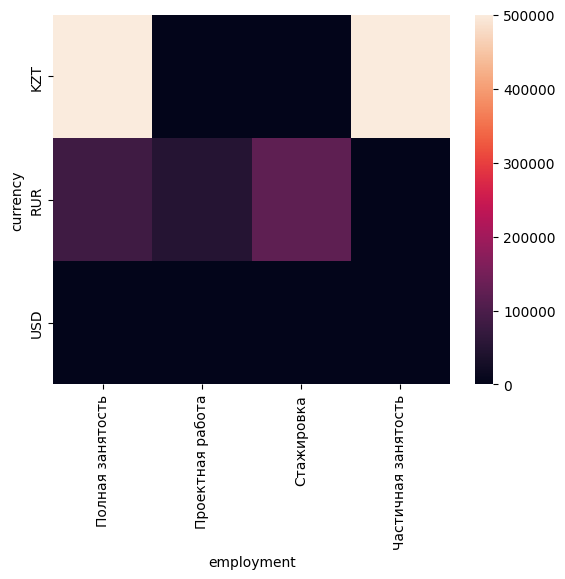

In [65]:
vac.salary_heatmap()

In [66]:
class  Vacancies(Vacancies):
  def salary_violin(self):
    import seaborn as sns
    sns.violinplot(self.df['currency'],self.df['to'])

In [68]:
vac=Vacancies()
vac.load('Бухгалтер')
vac.salary_violin()

<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])
<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])


TypeError: ignored

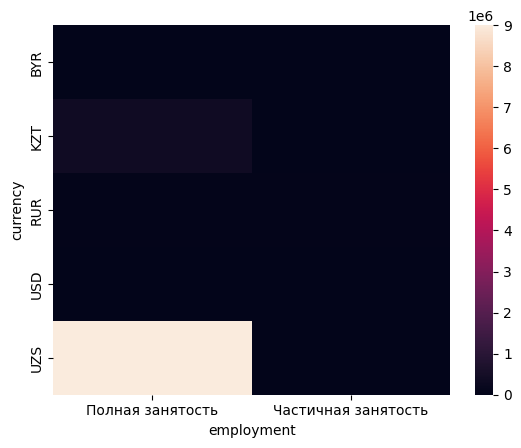

In [69]:
vac.salary_heatmap()

In [70]:
class  Vacancies(Vacancies):
  def salary_box(self):
    import plotly.express as px
    import matplotlib.pyplot as plt
    px.box(self.df,x ='currency', y='from',facet_row ='employment',title='Распределение зп').show()

In [71]:
vac=Vacancies()
vac.load('Бухгалтер')
vac.salary_box()

<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])
<ipython-input-58-bca7137cfbf7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp=tmp.append(df(js)[cols])
